# Red neuronal para el análisis del contenido

Usando los datos procesados en [Cleaning_news](Cleaning_news.ipynb), vamos a construir una NN con Keras para clasificar los textos.

In [50]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
#Nicer style
style.use('seaborn') 

from tensorflow import keras as k

from sklearn.model_selection import train_test_split

from gensim.models import KeyedVectors

In [69]:
data = pd.read_pickle('../data/news_proc.pickle')

In [70]:
data.head()

,type,content,title,one_hot_label
0,fake,"[2458, 4, 27, 17625, 12, 328, 5, 25587, 416, 1...","[1732, 258, 27, 7196, 2154, 4192, 88, 43, 13, ...","[0, 1, 0]"
1,fake,"[3836, 22, 506, 3059, 67, 2, 2941, 2429, 33, 3...","[6117, 13034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 0]"
2,fake,"[7, 37481, 39852, 483, 423, 24, 42, 1837, 81, ...","[6117, 13034, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 0]"
3,fake,"[7, 1790, 659, 24, 846, 6786, 5428, 17, 52, 44...","[13341, 1421, 1992, 1178, 8704, 11, 13034, 387...","[0, 1, 0]"
4,fake,"[59, 24, 216, 529, 104, 11, 34925, 133, 31, 24...","[13034, 43, 39049, 43, 76, 1588, 38, 23, 8158,...","[0, 1, 0]"


In [71]:
max_size_content = len(data['content'][0])

In [72]:
max_size_content

1527

### Word2Vec

In [73]:
model = KeyedVectors.load_word2vec_format("../data/GoogleNews-vectors-negative300.bin.gz", binary=True,
                                          limit=50000)

In [74]:
embed_mat = np.zeros((50000,300))

In [75]:
for i, e in model.vocab.items():
    embed_mat[e.index] = model[i]


Train / test split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    data['content'], data['one_hot_label'], test_size=0.33, random_state=42)

In [77]:
np.array(X_train)[0]

[15595,
 4061,
 15595,
 4061,
 4,
 1212,
 839,
 972,
 9923,
 2468,
 1,
 4236,
 5773,
 73,
 2247,
 1820,
 3581,
 2716,
 24198,
 358,
 2581,
 9923,
 33280,
 22,
 1266,
 1585,
 1871,
 17,
 996,
 57,
 26,
 783,
 5930,
 21,
 42,
 1,
 1411,
 2706,
 2,
 77,
 32,
 21,
 1085,
 14,
 1212,
 839,
 972,
 140,
 57,
 4,
 1816,
 1,
 1022,
 2412,
 10784,
 34170,
 4026,
 61,
 22,
 2009,
 26859,
 29,
 4091,
 2,
 9923,
 688,
 2438,
 43,
 359,
 15595,
 1,
 26,
 4909,
 500,
 4975,
 345,
 520,
 6404,
 636,
 20563,
 29,
 29524,
 393,
 11188,
 12994,
 11621,
 29,
 1801,
 26,
 54,
 7124,
 1636,
 5,
 11,
 1598,
 434,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

Arquitectura de la red

In [78]:
model = k.models.Sequential()

model.add(k.layers.Embedding(50000, 300, input_length=1527,
                    weights=[embed_mat], trainable=False))

model.add(k.layers.LSTM(300, dropout=0.2, recurrent_dropout=0.2))

model.add(k.layers.Dense(3, activation='softmax'))

In [79]:
model.compile(k.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1527, 300)         15000000  
_________________________________________________________________
lstm_5 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 903       
Total params: 15,722,103
Trainable params: 722,103
Non-trainable params: 15,000,000
_________________________________________________________________


In [81]:
hist = model.fit(x=np.asarray(X_train.tolist()), y=np.asarray(y_train.tolist()), batch_size=1, epochs=50,
          callbacks = [k.callbacks.EarlyStopping(monitor='val_acc', patience=5)], validation_split=0.3)

Train on 1393 samples, validate on 598 samples
Epoch 1/50
   5/1393 [..............................] - ETA: 2:07:12 - loss: 1.0858 - acc: 0.8000

KeyboardInterrupt: 

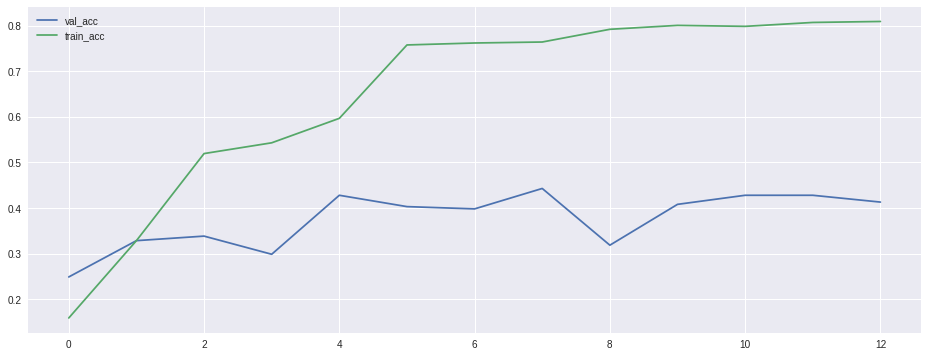

In [73]:
plt.figure(figsize=(16,6))
plt.plot(hist.history['val_acc'], label='val_acc')
plt.plot(hist.history['acc'], label='train_acc')
plt.legend()

Predicción

In [37]:
test_pred = model.predict(np.asarray(X_test.tolist()))